In [1]:
# Import the required libraries: Pandas, Numpy, Matplotlib and   Seaborn

import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
# Let us load and read the data from the csv file 

df=pd.read_csv("StudentsPerformance.csv")
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [3]:
df.sample(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
821,female,group D,bachelor's degree,free/reduced,none,78,90,93
136,male,group B,some high school,standard,completed,51,54,41


In [4]:
df["Total_Marks"]=df["math score"]+df["reading score"]+df["writing score"]
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [5]:
df["Percentage"]=df["Total_Marks"]*1/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [6]:
# Top 10  Best Performed Students Overall

top_10 =df.sort_values(["Percentage"], ascending=[False])[:10]
top_10

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
712,female,group D,some college,standard,none,98,100,99,297,99.000000
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667


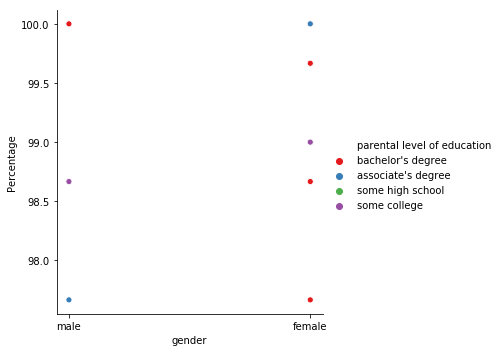

In [52]:
# Comparison of the Top 10 best performers against their gender and parental level of education

sns.relplot(x="gender", y="Percentage",hue="parental level of education",palette="Set1", data=top_10);

 #### Visualizing statistical relationships
Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

scatterplot() (with kind="scatter"; the default)
lineplot() (with kind="line")

## Scatter Plot 

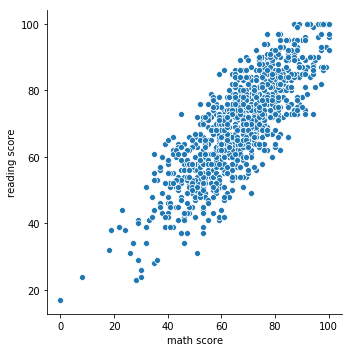

In [11]:
# Continuous Numerical Variable vs Continuous Numeric Variable

ax=sns.relplot(x="math score", y="reading score", data=df);

While the points are plotted in two dimensions, Let's add another dimension using the hue semantic

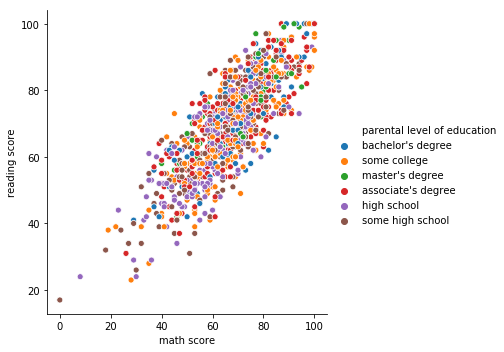

In [53]:
# Comparing maths and reading scores vs the gender distribution of the students

ax=sns.relplot(x="math score", y="reading score", hue="parental level of education",data=df);

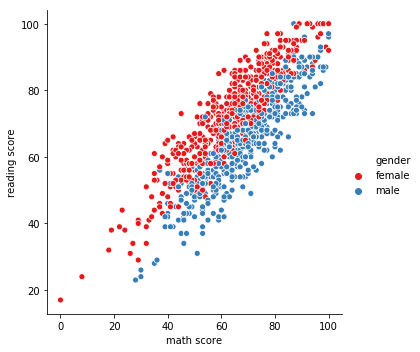

In [56]:
g = sns.relplot(x="math score", y="reading score", kind="scatter", hue="gender",palette="Set1", data=df)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

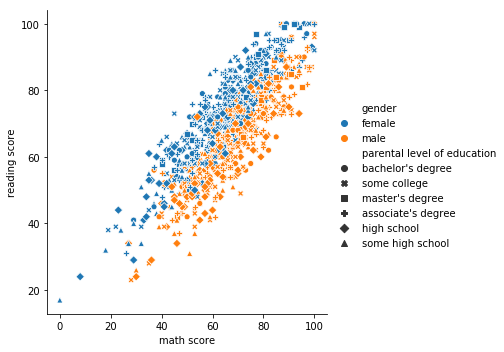

In [16]:
ax=sns.relplot(x="math score", y="reading score", hue="gender", style="parental level of education",data=df);

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to cubehelix_palette():

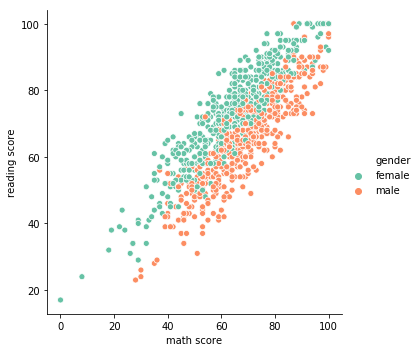

In [17]:
ax=sns.relplot(x="math score", y="reading score", hue="gender",palette="Set2",data=df);

#### Line Plot

Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

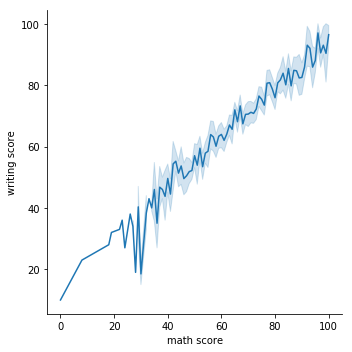

In [38]:
# Default Line Plot 

sns.relplot(x="math score", y="writing score", kind="line", data=df);

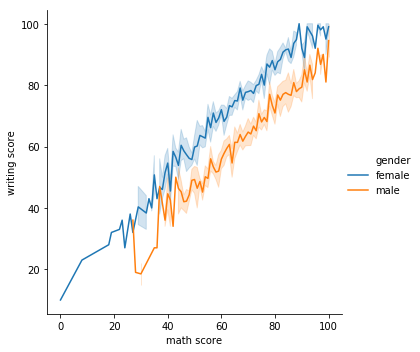

In [27]:
g = sns.relplot(x="math score", y="writing score", kind="line", hue="gender", data=df)

#### Plotting subsets of data with semantic mappings

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

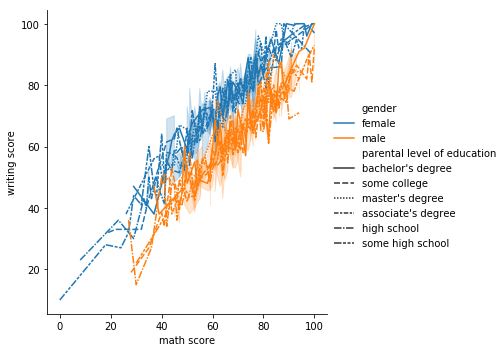

In [41]:
g = sns.relplot(x="math score", y="writing score", kind="line", hue="gender", style="parental level of education", data=df)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

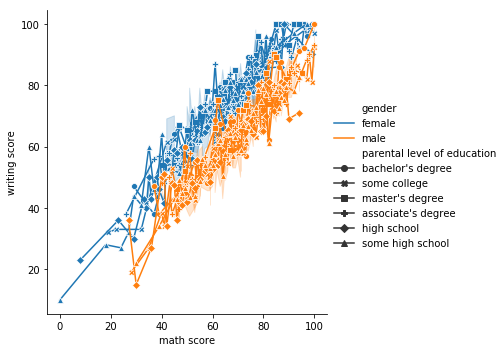

In [43]:
# added the dashes and markers subsets for observations

sns.relplot(x="math score", y="writing score", kind="line", hue="gender", style="parental level of education", dashes= False, markers=True, data=df)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

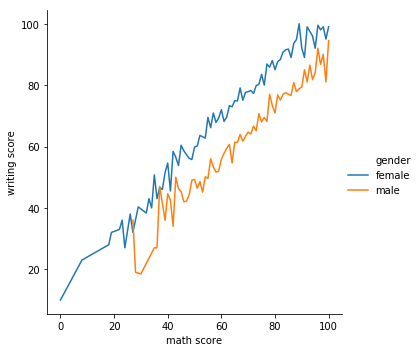

In [36]:
sns.relplot(x="math score", y="writing score", hue="gender", kind="line", ci=None, data=df)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

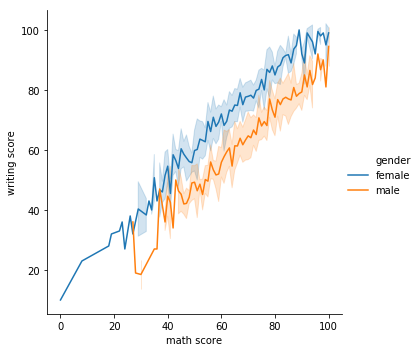

In [32]:
sns.relplot(x="math score", y="writing score", hue="gender", kind="line", ci="sd", data=df);

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

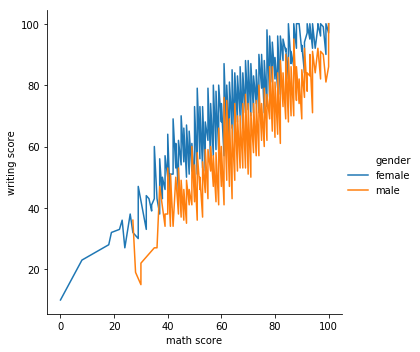

In [40]:
sns.relplot(x="math score", y="writing score",hue="gender", estimator=None, kind="line", data=df);

#### Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

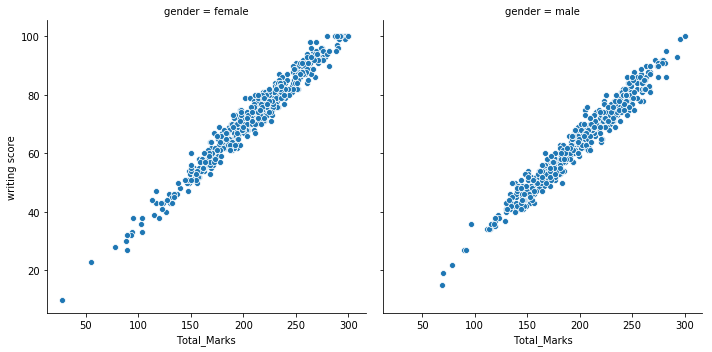

In [51]:
sns.relplot(x="Total_Marks", y="writing score",
            col="gender", data=df);